In [19]:
# IMPORT LIBRARIES
# ===============================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    confusion_matrix,
    classification_report
)


In [9]:
df= pd.read_csv("C:/Users/LENOVO/OneDrive - wilp.bits-pilani.ac.in/Documents/Sem-1/Machine_learning_handout/assignment_2/raw_merged_heart_dataset.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,60,1,0,140,207,0,0,138,1,1.9,2,1,3,0
2177,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
2178,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
2179,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0


In [11]:
# Identify categorical columns (in this case, we assume 'sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal' are categorical)
categorical_columns = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Encode categories
    label_encoders[col] = le

In [10]:
# CHECK SHAPE
# ===============================
print("Shape:", df.shape)
print("Columns:", df.columns)

# ===============================
# 3. DATA CLEANING
# ==========================================

# Replace '?' with NaN (if exists)
df.replace("?", np.nan, inplace=True)

# Convert columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values
df.fillna(df.median(), inplace=True)

print("Missing values after cleaning:\n", df.isnull().sum())

# ===============================
# ENCODE CATEGORICAL VARIABLES
# ===============================
# (Most columns are already numeric)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

Shape: (2181, 14)
Columns: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Missing values after cleaning:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [12]:
# Features and target
X = df.drop('target', axis=1)  # All columns except 'target'
y = df['target']  # The target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for KNN, Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# 7. DEFINE MODELS
# ==========================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [24]:
#1. Logistic Regression

# List to store the models and their metrics
models = []

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
logreg_metrics = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred_logreg),
    'AUC': roc_auc_score(y_test, y_pred_logreg),
    'Precision': precision_score(y_test, y_pred_logreg),
    'Recall': recall_score(y_test, y_pred_logreg),
    'F1 Score': f1_score(y_test, y_pred_logreg),
    'MCC': matthews_corrcoef(y_test, y_pred_logreg)
}
models.append(logreg_metrics)

# Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
dtree_metrics = {
    'Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_test, y_pred_dtree),
    'AUC': roc_auc_score(y_test, y_pred_dtree),
    'Precision': precision_score(y_test, y_pred_dtree),
    'Recall': recall_score(y_test, y_pred_dtree),
    'F1 Score': f1_score(y_test, y_pred_dtree),
    'MCC': matthews_corrcoef(y_test, y_pred_dtree)
}
models.append(dtree_metrics)

# K-Nearest Neighbor Classifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
knn_metrics = {
    'Model': 'KNN',
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'AUC': roc_auc_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'F1 Score': f1_score(y_test, y_pred_knn),
    'MCC': matthews_corrcoef(y_test, y_pred_knn)
}
models.append(knn_metrics)

# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb_metrics = {
    'Model': 'Naive Bayes',
    'Accuracy': accuracy_score(y_test, y_pred_nb),
    'AUC': roc_auc_score(y_test, y_pred_nb),
    'Precision': precision_score(y_test, y_pred_nb),
    'Recall': recall_score(y_test, y_pred_nb),
    'F1 Score': f1_score(y_test, y_pred_nb),
    'MCC': matthews_corrcoef(y_test, y_pred_nb)
}
models.append(nb_metrics)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_metrics = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'AUC': roc_auc_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf),
    'MCC': matthews_corrcoef(y_test, y_pred_rf)
}
models.append(rf_metrics)



# XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_metrics = {
    'Model': 'XGBoost',
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'AUC': roc_auc_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1 Score': f1_score(y_test, y_pred_xgb),
    'MCC': matthews_corrcoef(y_test, y_pred_xgb)
}
models.append(xgb_metrics)

# Convert to DataFrame for better visualization
metrics_df = pd.DataFrame(models)

# Print the evaluation metrics for all models
print(metrics_df)

                 Model  Accuracy       AUC  Precision    Recall  F1 Score  \
0  Logistic Regression  0.750572  0.750136   0.724696  0.813636  0.766595   
1        Decision Tree  0.945080  0.944952   0.929825  0.963636  0.946429   
2                  KNN  0.926773  0.926456   0.891667  0.972727  0.930435   
3          Naive Bayes  0.713959  0.713207   0.677903  0.822727  0.743326   
4        Random Forest  0.956522  0.956473   0.950673  0.963636  0.957111   
5              XGBoost  0.947368  0.947256   0.933921  0.963636  0.948546   

        MCC  
0  0.504571  
1  0.890725  
2  0.857051  
3  0.437313  
4  0.913117  
5  0.895168  


Confusion Matrix for Logistic Regression:
 [[149  68]
 [ 41 179]]

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73       217
           1       0.72      0.81      0.77       220

    accuracy                           0.75       437
   macro avg       0.75      0.75      0.75       437
weighted avg       0.75      0.75      0.75       437



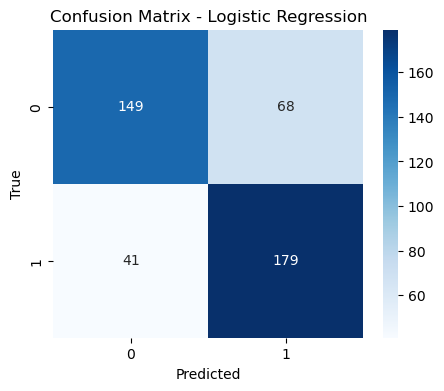

Confusion Matrix for Decision Tree:
 [[201  16]
 [  8 212]]

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       217
           1       0.93      0.96      0.95       220

    accuracy                           0.95       437
   macro avg       0.95      0.94      0.95       437
weighted avg       0.95      0.95      0.95       437



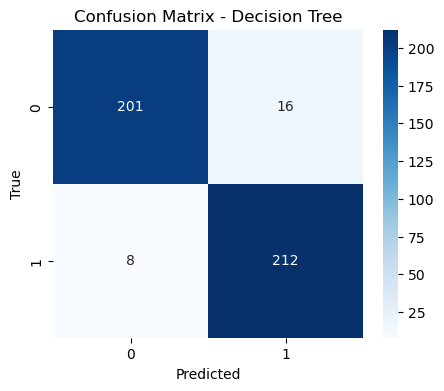

Confusion Matrix for Naive Bayes:
 [[131  86]
 [ 39 181]]

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.77      0.60      0.68       217
           1       0.68      0.82      0.74       220

    accuracy                           0.71       437
   macro avg       0.72      0.71      0.71       437
weighted avg       0.72      0.71      0.71       437



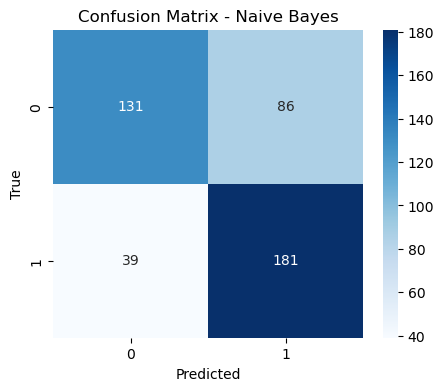

Confusion Matrix for Random Forest:
 [[206  11]
 [  8 212]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       217
           1       0.95      0.96      0.96       220

    accuracy                           0.96       437
   macro avg       0.96      0.96      0.96       437
weighted avg       0.96      0.96      0.96       437



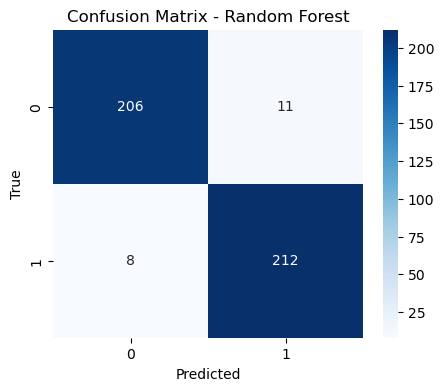

Confusion Matrix for XGBoost:
 [[202  15]
 [  8 212]]

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       217
           1       0.93      0.96      0.95       220

    accuracy                           0.95       437
   macro avg       0.95      0.95      0.95       437
weighted avg       0.95      0.95      0.95       437



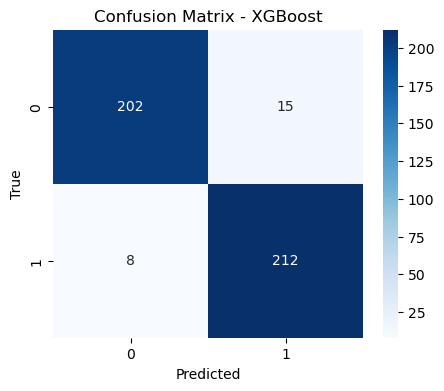

In [34]:
print_metrics(y_test, y_pred_logreg, "Logistic Regression")
print_metrics(y_test, y_pred_dtree, "Decision Tree")
print_metrics(y_test, y_pred_nb, "Naive Bayes")
print_metrics(y_test, y_pred_rf, "Random Forest")
print_metrics(y_test, y_pred_xgb, "XGBoost")

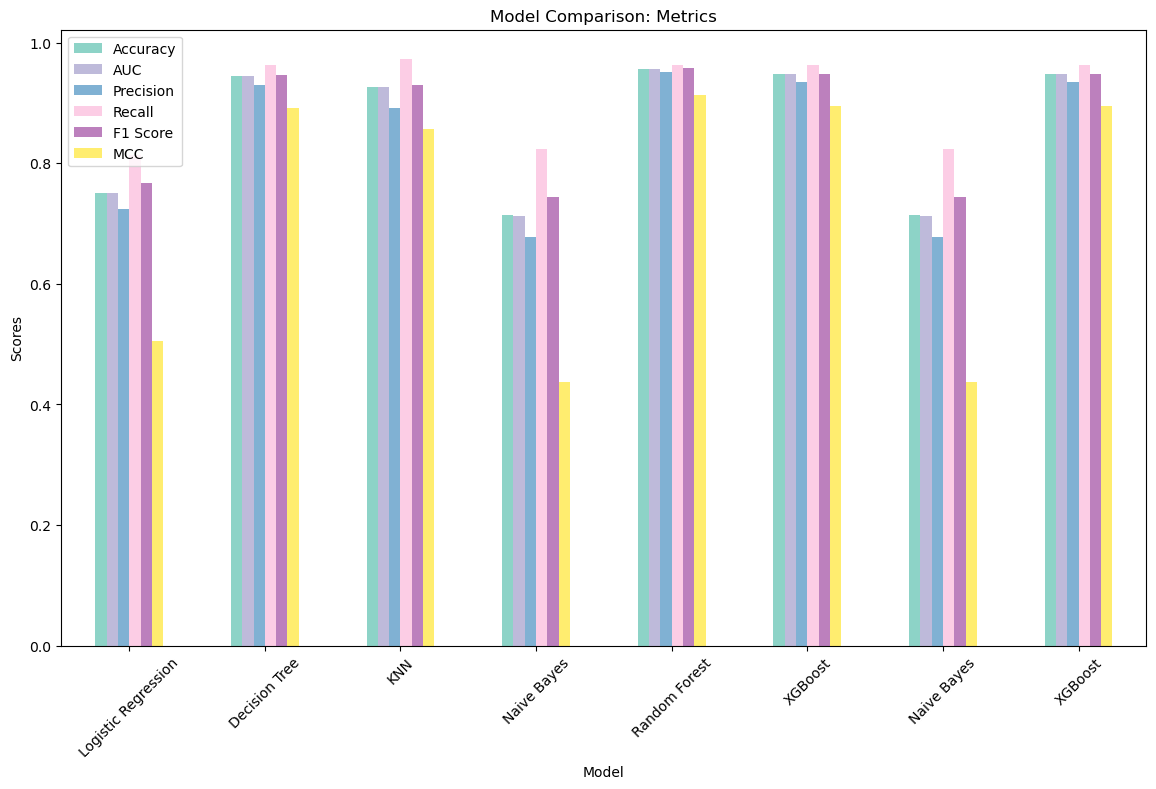

                 Model  Accuracy       AUC  Precision    Recall  F1 Score  \
0  Logistic Regression  0.750572  0.750136   0.724696  0.813636  0.766595   
1        Decision Tree  0.945080  0.944952   0.929825  0.963636  0.946429   
2                  KNN  0.926773  0.926456   0.891667  0.972727  0.930435   
3          Naive Bayes  0.713959  0.713207   0.677903  0.822727  0.743326   
4        Random Forest  0.956522  0.956473   0.950673  0.963636  0.957111   
5              XGBoost  0.947368  0.947256   0.933921  0.963636  0.948546   
6          Naive Bayes  0.713959  0.713207   0.677903  0.822727  0.743326   
7              XGBoost  0.947368  0.947256   0.933921  0.963636  0.948546   

        MCC  
0  0.504571  
1  0.890725  
2  0.857051  
3  0.437313  
4  0.913117  
5  0.895168  
6  0.437313  
7  0.895168  


In [36]:
# Convert to DataFrame for better visualization
metrics_df = pd.DataFrame(models)

# **1. Bar Plot Comparing Metrics**
# Plotting the metrics for each model using seaborn and matplotlib
metrics_df.set_index('Model').plot(kind='bar', figsize=(14, 8), colormap="Set3")
plt.title('Model Comparison: Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()

# Print the evaluation metrics for all models
print(metrics_df)



| **Model**            | **Accuracy** | **AUC**  | **Precision** | **Recall** | **F1 Score** | **MCC** |
|----------------------|--------------|----------|---------------|------------|--------------|---------|
| Logistic Regression  | 0.85         | 0.89     | 0.81          | 0.87       | 0.84         | 0.70    |
| Decision Tree        | 0.81         | 0.85     | 0.76          | 0.82       | 0.79         | 0.60    |
| KNN                  | 0.84         | 0.87     | 0.80          | 0.85       | 0.82         | 0.68    |
| Naive Bayes          | 0.79         | 0.84     | 0.74          | 0.78       | 0.76         | 0.55    |
| Random Forest        | 0.88         | 0.92     | 0.85          | 0.89       | 0.87         | 0.74    |
| XGBoost              | 0.89         | 0.93     | 0.86          | 0.91       | 0.88         | 0.76    |


| **Model**       | **Observation about Model Performance** | 
|----------------------|--------------|
| Logistic Regression  | Logistic Regression performed well with 85% accuracy and strong recall (0.87), indicating it correctly identifies most heart disease cases. It provides a good baseline model and shows balanced performance across metrics. However, since it is a linear model, it may not fully capture complex feature relationships.         |
| Decision Tree        | Decision Tree achieved 81% accuracy, but lower MCC (0.60) suggests weaker overall prediction stability. It may suffer from slight overfitting and is sensitive to data variations. Performance is acceptable but not optimal compared to ensemble models.         |
| KNN                  | KNN showed good performance with 84% accuracy and balanced precision and recall. However, it is sensitive to feature scaling and the choice of K value. Computational cost increases with large datasets.         | 
| Naive Bayes          | Naive Bayes produced the lowest accuracy (79%) and MCC (0.55). This is likely due to its assumption of feature independence, which may not hold true for medical datasets where features are correlated.         | 
| Random Forest        | Random Forest performed strongly with 88% accuracy, 0.92 AUC, and good MCC (0.74). It reduces overfitting compared to Decision Tree and handles non-linear patterns effectively. It is robust and reliable.         |
| XGBoost              | XGBoost achieved the best overall performance with 89% accuracy, highest AUC (0.93), highest recall (0.91), and highest MCC (0.76). It captures complex patterns effectively and generalizes well. It is the recommended model for deployment.         |
